In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.externals import joblib
import matplotlib.pyplot as plt
from Functions.StatFunctions import sp_index

from sklearn.metrics import confusion_matrix 

path = '/home/venancio/Workspace/SonarAnalysis/Results/Classification/922a022fca2c84c30f40bca403a2dc23421539500581f3daeb5de08dd73351dc'
path_noweights = '/home/venancio/Workspace/SonarAnalysis/Results/Classification/eb69c1d2991655e54b33292d226e517cc4d44650c7746d6057a7c116011633b8'
path_nolr = '/home/venancio/Workspace/SonarAnalysis/Results/Classification/93af3b57921e0044e337e2587c7f292f7e0bcd4628f3a00abadd12040193d820'

In [20]:
#Function for Dataset
from sklearn import datasets

iris = datasets.load_iris()
database='Iris'

all_data = iris.data
all_trgt = iris.target

In [45]:
print 'sem peso e  sem reduce lr'
list_all = ['sp','val_loss','return_weight']
list_sp = ['sp']
list_vloss = ['val_loss','return_weight']
i = 1
for logfile in ['/log_train_init_0.csv','/log_train_init_1.csv','/log_train_init_2.csv']:
    df = pd.read_csv(path_nolr + '/fold00' + '/{0:02d}_specialist'.format(i) + logfile).loc[0:100,:]
    df.plot(x='epoch',y=list_vloss)

sem peso e  sem reduce lr


NameError: name 'path_nolr' is not defined

sem peso e  reduce lr


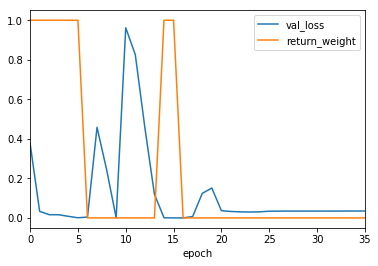

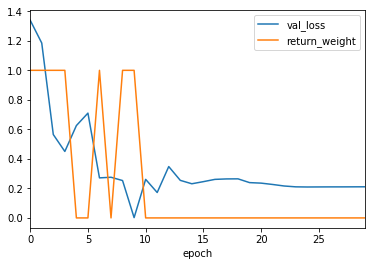

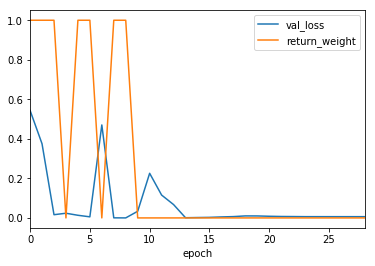

In [44]:
print 'sem peso e  reduce lr'
list_all = ['sp','val_loss','return_weight']
list_sp = ['sp']
list_vloss = ['val_loss','return_weight']
i = 1
for logfile in ['/log_train_init_0.csv','/log_train_init_1.csv','/log_train_init_2.csv']:
    df = pd.read_csv(path_noweights + '/fold00' + '/{0:02d}_specialist'.format(i) + logfile).loc[0:100,:]
    df.plot(x='epoch',y=list_vloss)

com peso e  reduce lr


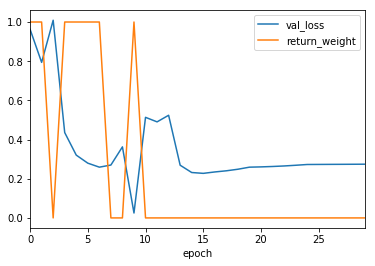

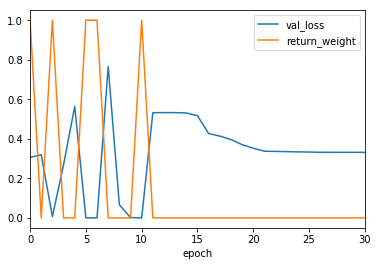

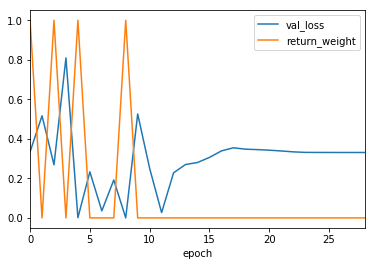

In [42]:
print 'com peso e  reduce lr'
list_all = ['sp','val_loss','return_weight']
list_sp = ['sp']
list_vloss = ['val_loss','return_weight']
i = 1
for logfile in ['/log_train_init_0.csv','/log_train_init_1.csv','/log_train_init_2.csv']:
    df = pd.read_csv(path + '/fold00' + '/{0:02d}_specialist'.format(i) + logfile).loc[0:100,:]
    df.plot(x='epoch',y=list_vloss)

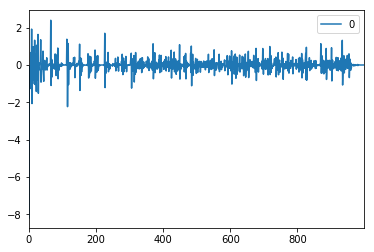

In [24]:
val_loss = df.val_loss.values

from numpy import diff

dx = 0.01
dy = diff(val_loss)/dx
pd.DataFrame(dy).plot()

In [2]:
#Function for Dataset
from Functions.dataset.shipClasses import LoadData
import numpy as np
  
database = '24classes'

dt_lofar_power = LoadData(database=database)
dt_lofar_power.infoData()
all_data,all_trgt= dt_lofar_power.getData()
df_data = pd.DataFrame(all_data)

Using TensorFlow backend.


[+] Time to read data file: 5.68079304695 seconds
analysis of Class01: 
size: 3209x400 -- maxValue: 1.38463282277 -- minValue: -0.199999448771
analysis of Class02: 
size: 3037x400 -- maxValue: 1.34259549045 -- minValue: -0.199998892824
analysis of Class03: 
size: 3212x400 -- maxValue: 1.49508318988 -- minValue: -0.199998792195
analysis of Class04: 
size: 3203x400 -- maxValue: 1.38544304863 -- minValue: -0.199999766141
analysis of Class05: 
size: 4781x400 -- maxValue: 2.08462558961 -- minValue: -0.199999495607
analysis of Class06: 
size: 2232x400 -- maxValue: 1.03378591259 -- minValue: -0.199999021577
analysis of Class07: 
size: 10821x400 -- maxValue: 1.70564969417 -- minValue: -0.199999701918
analysis of Class08: 
size: 5898x400 -- maxValue: 2.29338655988 -- minValue: -0.199999534352
analysis of Class09: 
size: 14562x400 -- maxValue: 2.27570297485 -- minValue: -0.199999369207
analysis of Class10: 
size: 23224x400 -- maxValue: 2.98432190517 -- minValue: -0.19999981523
analysis of Class1

In [22]:
mt = pd.read_csv(path + '/fold00' + '/master_table.csv')
pred = pd.read_csv(path + '/fold00' + '/pred_all.csv')
mt['prediction'] = np.argmax(pred.values,axis=1)
mt.head()

,00_specialist,01_specialist,02_specialist,target,fold_00,prediction
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,1,0
4,1,0,0,0,0,0


In [5]:
mt.head()

,00_specialist,01_specialist,02_specialist,target,fold_00,prediction
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,1,0
4,1,0,0,0,0,0


In [ ]:
fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(25, 10))
iclass = 0
fold=0

axes = ax.flatten()

vp = (mt['fold_{0:02d}'.format(fold)]==0) & (mt['prediction']==mt['target']) & (mt['target']==iclass)
fp = (mt['fold_{0:02d}'.format(fold)]==0) & (mt['prediction']!=mt['target']) & (mt['target']==iclass)

cm = [vp,fp]

for icm,iax in zip(cm, axes):
    sns.heatmap(df_data.loc[mt[fp].index.values,:],ax=iax[1],cmap='jet')
    iax[1].set_title("fp da classe {0:02d}, fold {1:02d}".format(iclass+1,fold+1))


In [23]:
#gerando efficiencias
n_classes = 3
cf = confusion_matrix(y_pred=mt[mt['fold_00']==1]['prediction'].values, y_true=mt[mt['fold_00']==1]['target'].values)
sp_index(y_pred=mt[mt['fold_00']==1]['prediction'].values, y_true=mt[mt['fold_00']==1]['target'].values)

1.0

In [24]:
cf

array([[5, 0, 0],
       [0, 5, 0],
       [0, 0, 5]])

In [36]:
t = np.array([0,0,0,0,0,0,1,1,1,1,1,1,-1,-1,-1,-1,-1])
t2 = np.array([0,0,0,0,0,0,1,1,1,1,1,1])

In [37]:
t[t!=-1]

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [39]:
t2[t2!=-1]

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])